<a href="https://colab.research.google.com/github/OlivierDataS/github_actions/blob/master/Map_Visu(160323).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualisation des résultâts de préprocessing

In [4]:
df=pd.read_csv(r'/content/drive/MyDrive/Visu/PPCS_reunion_clean.csv',sep=',',header=0)
df.head()

,ID,Nom_du_POI,Latitude,Longitude,Adresse_postale,Date_de_mise_a_jour,Contacts_du_POI,Description,region,commune,code_postal,subclass_0,subclass_1,superclass_0,superclass_1
0,187a27ff-8ad2-3298-9b2f-064023dd042b,Lentille des Gourmets (La),-21.135884,55.479501,"40 E, chemin des Trois Mares",2022-05-30,Lentille des Gourmets (La)#+33 2 62 31 85 85#h...,NaN,54,Cilaos,97413,Restaurant,NaN,FoodEstablishment,NaN
1,ac5515a8-d78e-35ed-a51e-6fc6b1ddbb2b,Neptune (Le),-21.341440,55.462664,"117, boulevard Hubert Delisle",2021-07-13,Neptune (Le)#+33 2 62 61 61 61#reservation@leb...,NaN,54,Saint-Pierre,97410,LeisureSportActivityProvider,NaN,ActivityProvider,NaN
2,43079596-c868-3cfe-a280-aeaf15d5666c,Grand Large (Le),-21.341440,55.462664,"117, boulevard Hubert Delisle",2021-07-13,Grand Large (Le)#+33 2 62 61 61 61#reservation...,NaN,54,Saint-Pierre,97410,Restaurant,NaN,FoodEstablishment,NaN
3,f2a140d5-152c-300b-accb-67619012a89a,Concorde (Le),-20.896258,55.447236,"91 bis, allée des Topazes - Bellepierre",2019-10-10,Concorde (Le)#+33 2 62 51 51 51#info@hotel-bel...,NaN,54,Saint-Denis,97400,Restaurant,LeisureSportActivityProvider,FoodEstablishment,ActivityProvider
4,9c77eb5d-8fd9-3700-8e77-e830870e9669,Jardin de la Maison d'Edith (Le),-20.889919,55.407147,"59, chemin Commins",2020-05-07,Jardin de la Maison d'Edith (Le)#+33 6 92 69 6...,NaN,54,Saint-Denis,97417,CulturalSite,NaN,CulturalSite,NaN


Exemple avec Seaborn, sans carte simplement avec les coordonnées géographiques

In [7]:
import seaborn as sns


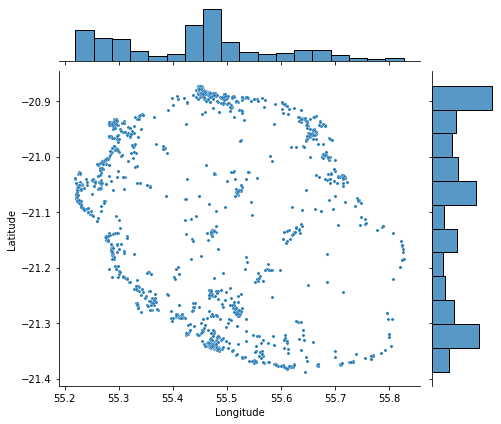

In [8]:
sns.jointplot(x='Longitude', y='Latitude', data=df, s=10 ).fig.set_figwidth(7)

Exemple avec Folium, avec une carte OpenStreetMap

In [6]:
# La première fois
# !pip install folium

import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
reunion_coords = [-21.1151, 55.5364]
m = folium.Map(location=reunion_coords,zoom_start=11)
m.add_child(folium.LatLngPopup())

# Input : Liste des catégories à afficher (de 1 à 19 catégories max)
categories={'FoodEstablishment', 'ActivityProvider', 'CulturalSite',
        'NaturalHeritage','Store','SportsAndLeisurePlace'}

# Liste des couleurs possibles
av_colors={'red', 'blue','black', 'green', 'orange', 'beige','lightblue', 'purple',
           'darkblue', 'cadetblue', 'darkred', 'gray', 'darkgreen', 'lightgreen', 'pink',
           'lightgray', 'lightred', 'white', 'darkpurple'}

# Création de la palette de couleurs associée aux catégories à afficher
colors={categorie:color for (categorie,color) in zip(categories,av_colors)}

# Création du dataframe filtré pour les catégories à afficher
df_filtered=df[df.superclass_0.isin(categories)]

# Ajouter un marqueur pour chaque POI
for index, row in df_filtered.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']
    nom = row['Nom_du_POI']
    categorie = row['superclass_0']
    color = colors[categorie]
    popup_text = f"Nom: {nom}<br>Catégorie: {categorie}"
    icon = folium.Icon(color=color, icon_size='small')
    folium.Marker([lat, lon], icon=icon, popup=popup_text).add_to(m)

# Ajouter une légende à la carte
legend_html = """
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: 200px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white;">
     &nbsp;<b>Légende</b><br>
     """
for category, color in colors.items():
    legend_html += f'&nbsp;<i class="fa fa-map-marker fa-2x" style="color:{color}"></i>&nbsp; {category} <br>'
legend_html += "</div>"
m.get_root().html.add_child(folium.Element(legend_html))

# Afficher la carte
m


# Visualisation des résultâts du SQL

Exemple avec Geopandas, avec une carte prédéfinie

In [ ]:
# Visualisation GPS - via Conda
# !pip install matplotlib
# Geopandas et dépendances
!pip install geopandas
# !pip install --upgrade pyshp
# !pip install --upgrade shapely
# !pip install --upgrade descartes

import geopandas as gpd
import matplotlib.pyplot as plt

In [9]:
result = pd.read_csv('/content/drive/MyDrive/Visu/SQL_result.csv')
result.head()

,Nom_du_POI,commune,code_postal,Latitude,Longitude,category_median
0,Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite
1,Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite
2,Mosquée Noor-e-Islam,Saint-Denis,97400,-20.879185,55.452474,ReligiousSite
3,Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite
4,Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite


In [14]:
# Conversion des coordonnées géographiques
gdf = gpd.GeoDataFrame(
    result, geometry=gpd.points_from_xy(result.Longitude, result.Latitude))
gdf.head()

,Nom_du_POI,commune,code_postal,Latitude,Longitude,category_median,geometry
0,Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite,POINT (55.45808 -20.88066)
1,Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite,POINT (55.44879 -20.87716)
2,Mosquée Noor-e-Islam,Saint-Denis,97400,-20.879185,55.452474,ReligiousSite,POINT (55.45247 -20.87918)
3,Temple Kali Kampal,Saint-Denis,97400,-20.880661,55.458077,ReligiousSite,POINT (55.45808 -20.88066)
4,Cathédrale Saint-Denis,Saint-Denis,97400,-20.877163,55.448789,ReligiousSite,POINT (55.44879 -20.87716)


In [16]:
# Polygones des départements français
import zipfile
import requests

# A partir de l'url :
url_dep = "http://osm13.openstreetmap.fr/~cquest/openfla/export/departements-20180101-shp.zip"

file_dep = "departements-20180101-shp.zip"

r = requests.get(url_dep)

open(file_dep, 'wb').write(r.content)

with zipfile.ZipFile(file_dep, 'r') as unzip: unzip.extractall("dep.shp")

dep = gpd.read_file("dep.shp")

# dep.head()

Text(0.5, 1.0, 'Ile de La Réunion')

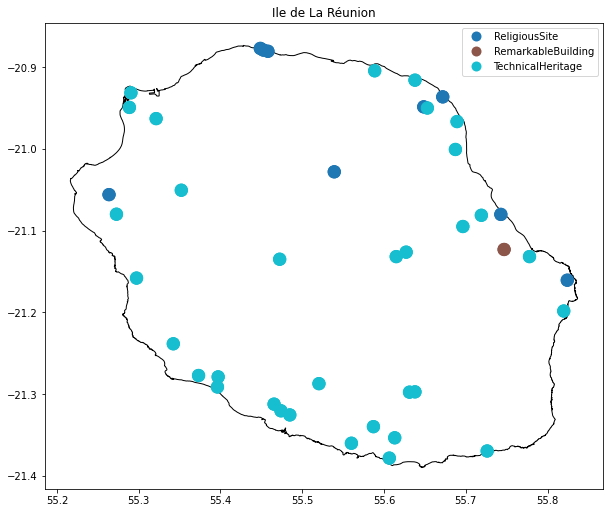

In [17]:
# Visualisation de la localisation
fig, ax = plt.subplots(figsize = (10,10))
dep[dep.code_insee == '974'].plot(ax=ax,color='white', edgecolor='black')
gdf.plot(ax=ax,column="category_median", s=150, legend=True)
ax.set_title('Ile de La Réunion')

Exemple avec Folium, avec une carte OpenStreetMap

In [21]:
# Via FOLIUM - approche GROUP (cf légende) seulement

map = folium.Map(location=[result.Latitude.mean(), result.Longitude.mean()], 
                 zoom_start=11, 
                 tiles='openstreetmap',
                 control_scale=True)

icon_symbol_list = ['', 'star', 'flag', 'male']

icon_color_list = ['green', 'red', 'blue', 'darkpurple', 'yellow', 'black', 'lightred', 'gray', 'lightblue', 'lightgray', 'lightgreen', 'beige', 'darkred', 'white', 'cadetblue', 'purple', 'darkblue', 'orange', 'pink']
icon_color_num = 0 

for cat, result_gb in result.groupby('category_median'):

  fg = folium.FeatureGroup(cat)

  icon_color = icon_color_list[icon_color_num]
  icon_color_num = icon_color_num + 1

  for row in result_gb.itertuples():
    
    iframe = folium.IFrame('*Nom: '+str(row.Nom_du_POI)+'<br>'+'*Categorie: '+str(row.category_median))
    
    popup = folium.Popup(iframe, min_width=200, max_width=200)


    folium.Marker(location=[row.Latitude, row.Longitude], popup = popup, icon=folium.Icon(color=icon_color, icon='', prefix='')).add_to(fg)
    fg.add_to(map)


folium.TileLayer('Stamen Terrain').add_to(map)
folium.TileLayer('openstreetmap').add_to(map)
folium.LayerControl(position='topright', collapsed=False).add_to(map) 

map.save('/content/drive/MyDrive/Visu/reunion.html')
map

# Visualisation des résultâts du ML

Exemple avec Folium, avec une carte OpenStreetMap

In [23]:
result = pd.read_csv('/content/drive/MyDrive/Visu/ML_itinerary.csv')
result.head()

,Unnamed: 0,Jour,Type,Nom_du_POI,commune,Adresse_postale,Longitude,Latitude,superclass_0,subclass_0,superclass_1,subclass_1
0,43,1,Restaurant,Brasserie By Le Cap Méchant,Sainte-Suzanne,Rue Marais - Centre Commercial Carrefour,55.632343,-20.928522,FoodEstablishment,Restaurant,NaN,NaN
1,134,1,Activité,Est Rando Quad,Saint-André,1783 chemin Grand Canal RDM Les Bas,55.690000,-20.969000,NaturalHeritage,NaturalHeritage,NaN,NaN
2,35,1,Restaurant,Ferme Auberge Chez Eva Annibal,Bras-Panon,"6, chemin Rivière du Mât",55.682904,-20.991730,FoodEstablishment,FarmhouseInn,NaN,NaN
3,34,1,Restaurant,Snack Pizza Ado,Bras-Panon,"2, impasse des Améthystes - local 3",55.691000,-20.999937,FoodEstablishment,FoodEstablishment,NaN,NaN
4,7,1,POI,Neverland,Bras-Panon,"9, rue des Avocatiers",55.687062,-21.002364,CulturalSite,CulturalSite,NaN,NaN


In [24]:
map = folium.Map(location=[result.Latitude.mean(), result.Longitude.mean()], 
                 zoom_start=11, 
                 tiles='openstreetmap',
                 control_scale=True)

icon_symbol_list = ['', 'star', 'flag', 'male']

icon_color_list = ['green', 'red', 'blue', 'darkpurple', 'yellow', 'black', 'lightred', 'gray', 'lightblue', 'lightgray', 'lightgreen', 'beige', 'darkred', 'white', 'cadetblue', 'purple', 'darkblue', 'orange', 'pink']
icon_color_num = 0 

for cat, result_gb in result.groupby('Type'):

  fg = folium.FeatureGroup(cat)

  icon_color = icon_color_list[icon_color_num]
  icon_color_num = icon_color_num + 1

  for row in result_gb.itertuples():
    
    iframe = folium.IFrame('*Nom: '+str(row.Nom_du_POI)+'<br>'+'*Categorie: '+str(row.Type))
    
    popup = folium.Popup(iframe, min_width=200, max_width=200)


    folium.Marker(location=[row.Latitude, row.Longitude], popup = popup, icon=folium.Icon(color=icon_color, icon='', prefix='')).add_to(fg)
    fg.add_to(map)


folium.TileLayer('Stamen Terrain').add_to(map)
folium.TileLayer('openstreetmap').add_to(map)
folium.LayerControl(position='topright', collapsed=False).add_to(map) 

map.save('/content/drive/MyDrive/Visu/reunion.html')
map